In [2]:
!pip install pyvo

     |████████████████████████████████| 808kB 2.8MB/s 
  Created wheel for pyvo: filename=pyvo-1.1-cp36-none-any.whl size=801573 sha256=5c627561a344539fdaa86105bf6efd668043c1db0395dcc21dbf3719fd3b3221
  Stored in directory: /root/.cache/pip/wheels/d9/00/df/656aac56938f1c83dfcb361346f74101ce1f8c849fc93b18dc
  Created wheel for mimeparse: filename=mimeparse-0.1.3-cp36-none-any.whl size=3864 sha256=5518bb6761bcda44ae5ba5e12f458f98ce293d46a23805bd287a53168d8b991e
  Stored in directory: /root/.cache/pip/wheels/54/ca/c7/3db47cc5c748286db22a7fab43ccf985903d2b9ca119de16ab
Successfully built pyvo mimeparse


In [3]:
!pip install aplpy

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 1.1MB 8.8MB/s 
     |████████████████████████████████| 378kB 24.2MB/s 
     |████████████████████████████████| 1.3MB 34.0MB/s 
     |████████████████████████████████| 204kB 48.6MB/s 
  Created wheel for pyregion: filename=pyregion-2.0-cp36-cp36m-linux_x86_64.whl size=308456 sha256=2145ebbd908d898eea010fbbc585c6ae9a62ad7e8ff86b17c1825f6154d08e6c
  Stored in directory: /root/.cache/pip/wheels/ca/2c/2b/c95350df7d42ba9044b7528c5ba549bead550433b189008a7f
Successfully built pyregion


In [4]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import pyvo as vo

from astropy.io import fits
import astropy.coordinates as coord
# For downloading files
from astropy.utils.data import download_file

import aplpy
from IPython.display import Image as ipImage, display

# There are a number of relatively unimportant warnings that show up, so for now, suppress them:
import warnings
warnings.filterwarnings("ignore", module="astropy.io.votable.*")
warnings.filterwarnings("ignore", module="pyvo.utils.xml.*")

In [5]:
uv_services = vo.regsearch(servicetype='image',waveband='uv')
uv_services.to_table()['ivoid','short_name','res_title']

ivoid,short_name,res_title
object,object,object
ivo://archive.stsci.edu/sia/galex,GALEX,Galaxy Evolution Explorer
ivo://archive.stsci.edu/siap/hla,HLA,Hubble Legacy Archive
ivo://irsa.ipac/mast/scrapbook,MAST-Scrapbook,The MAST Image Scrapbook
ivo://irsa.ipac/spitzer/images/lvl,LVL,Spitzer Local Volume Legacy Survey
ivo://irsa.ipac/wise/images/z0mgs,z0MGS,The z=0 Multiwavelength Galaxy Synthesis
ivo://mast.stsci/acsggct,HST.ACSGGCT,ACS Galactic Globular Cluster Survey (ACSGGCT)
ivo://mast.stsci/angrrr,HST.ANGRRR,"Archive of Nearby Galaxies: Reduce, Reuse, Recycle (ANGRRR)"
ivo://mast.stsci/candels,CANDELS,Cosmic Assembly Near-IR Deep Extragalactic Legacy Survey (CANDELS)
ivo://mast.stsci/clash,HST.CLASH,Cluster Lensing And Supernova survey with Hubble (CLASH)


In [6]:
uvot_services = vo.regsearch(servicetype='image',waveband='uv',keywords=['SWIFT'])
uvot_services.to_table()['ivoid','short_name','res_title']

ivoid,short_name,res_title
object,object,object
ivo://nasa.heasarc/skyview/swiftuvot,SWIFTUVOT,Swift UVOT Combined V Intensity Images


In [12]:
coords = coord.SkyCoord.from_name("Centaurus A")

im_table = uvot_services[0].search(pos=coords,size=0.2,format='image/jpeg')
im_table.to_table()

Survey,Ra,Dec,Dim,Size,Scale,Format,PixFlags,URL,LogicalName
object,float64,float64,int32,object,object,object,object,object,object
swiftuvotvint,201.365062879333,-43.019112667361,2,[300 300],[-0.0006666666666666668 0.0006666666666666668],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=201.365062879333%2C-43.019112667361&survey=swiftuvotvint&pixels=300%2C300&sampler=LI&size=0.20000000000000004%2C0.20000000000000004&projection=Tan&coordinates=J2000.0&requestID=skv1601712466099&nofits=1&quicklook=jpeg&return=jpeg,1
swiftuvotbint,201.365062879333,-43.019112667361,2,[300 300],[-0.0006666666666666668 0.0006666666666666668],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=201.365062879333%2C-43.019112667361&survey=swiftuvotbint&pixels=300%2C300&sampler=LI&size=0.20000000000000004%2C0.20000000000000004&projection=Tan&coordinates=J2000.0&requestID=skv1601712466536&nofits=1&quicklook=jpeg&return=jpeg,2
swiftuvotuint,201.365062879333,-43.019112667361,2,[300 300],[-0.0006666666666666668 0.0006666666666666668],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=201.365062879333%2C-43.019112667361&survey=swiftuvotuint&pixels=300%2C300&sampler=LI&size=0.20000000000000004%2C0.20000000000000004&projection=Tan&coordinates=J2000.0&requestID=skv1601712468103&nofits=1&quicklook=jpeg&return=jpeg,3
swiftuvotuvw1int,201.365062879333,-43.019112667361,2,[300 300],[-0.0006666666666666668 0.0006666666666666668],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=201.365062879333%2C-43.019112667361&survey=swiftuvotuvw1int&pixels=300%2C300&sampler=LI&size=0.20000000000000004%2C0.20000000000000004&projection=Tan&coordinates=J2000.0&requestID=skv1601712469659&nofits=1&quicklook=jpeg&return=jpeg,4
swiftuvotuvw2int,201.365062879333,-43.019112667361,2,[300 300],[-0.0006666666666666668 0.0006666666666666668],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=201.365062879333%2C-43.019112667361&survey=swiftuvotuvw2int&pixels=300%2C300&sampler=LI&size=0.20000000000000004%2C0.20000000000000004&projection=Tan&coordinates=J2000.0&requestID=skv1601712473201&nofits=1&quicklook=jpeg&return=jpeg,5
swiftuvotuvm2int,201.365062879333,-43.019112667361,2,[300 300],[-0.0006666666666666668 0.0006666666666666668],image/jpeg,F,https://skyview.gsfc.nasa.gov/cgi-bin/images?position=201.365062879333%2C-43.019112667361&survey=swiftuvotuvm2int&pixels=300%2C300&sampler=LI&size=0.20000000000000004%2C0.20000000000000004&projection=Tan&coordinates=J2000.0&requestID=skv1601712476974&nofits=1&quicklook=jpeg&return=jpeg,6


In [13]:
url = im_table[0].getdataurl()
print(url)

https://skyview.gsfc.nasa.gov/cgi-bin/images?position=201.365062879333%2C-43.019112667361&survey=swiftuvotvint&pixels=300%2C300&sampler=LI&size=0.20000000000000004%2C0.20000000000000004&projection=Tan&coordinates=J2000.0&requestID=skv1601712466099&nofits=1&quicklook=jpeg&return=jpeg


In [14]:
img = ipImage(url=im_table[0].getdataurl())
display(img)

In [15]:
im_table = uvot_services[0].search(pos=coords,size=0.2,format='image/fits')
#  Hand the url of the first result to fits.open()
hdu_list = fits.open(im_table[0].getdataurl())
hdu_list.info()

Filename: /root/.astropy/cache/download/py3/9534e4ca3fd989d5469fff2d9553987c
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     111   (300, 300)   float32   


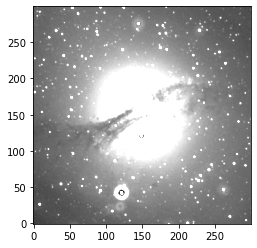

In [16]:
plt.imshow(hdu_list[0].data, cmap='gray', origin='lower',vmax=0.1)